# Множественная регрессия

Множественной (multiple regression) называют линейную регрессию, в модели которой число независимых переменных две или более.

Может широко применяться для:
1.	Получения наилучшего линейного уравнения прогноза.
2.	Контроля за смешиванием переменных (факторов).
3.	Оценки вклада определенной совокупности переменных.
4.	Объяснения сложного на вид многомерного комплекса взаимосвязей.
5.	Проведения дисперсионного и ковариационного анализов посредством кодирования уровней независимых переменных.

Уравнение множественной линейной регрессии имеет вид:

Y=b0+b1x1+b2x2+…+bnxn

Как и в простой линейной регрессии, параметры модели bn вычисляются при помощи метода наименьших квадратов.

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.

Преимущество множественной линейной регрессии по сравнению с простой заключается в том, что использование в модели нескольких входных переменных позволяет увеличить долю объясненной дисперсии выходной переменной и таким образом улучшить соответствие модели данным. Т.е. при добавлении в модель каждой новой переменной коэффициент детерминации растет.

Однако в множественной линейной регрессии возникают и проблемы, не характерные для простой модели:
- возможно появление мультиколлинеарности ;
- необходимо выбирать лучшую модель, в которой минимальный набор независимых переменных сможет объяснить наибольшую долю дисперсии зависимой. 

Для построения множественной линейной регрессии откроем новый блокнот и загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
%run f2forecast.py

Загрузим и изучим структуру датасета.



In [3]:
df=pd.read_excel("dataset_1.xlsx")
df.head()

,День,Дата,Потребл.эн,Ставка,Температура,Давление,Влажность,Облачность
0,1,2020-02-01 00:00:00.000,2755175,1584.00,-22.3,731.4,73,0
1,1,2020-02-01 01:00:00.000,2806009,1570.75,-22.3,731.4,73,0
2,1,2020-02-01 01:59:59.990,2900417,1584.69,-22.3,731.4,73,0
3,1,2020-02-01 02:59:59.985,3043738,1604.15,-23.5,732.7,77,0
4,1,2020-02-01 03:59:59.980,3160592,1607.73,-23.5,732.7,77,0




На всякий случай выполним заполнение нулями ячеек с пропусками.

In [4]:
df.fillna(0, inplace=True)

Изучим динамику фактических значений нашего ряда.

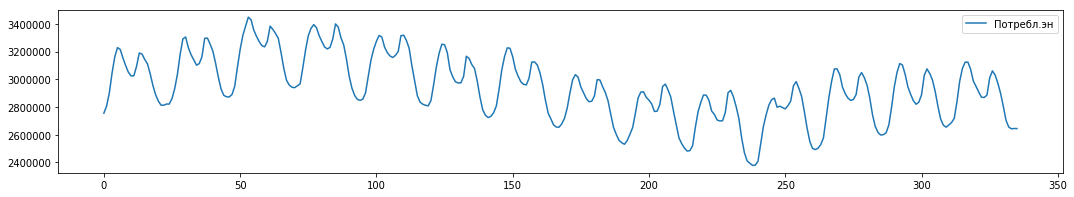

In [5]:
df[['Потребл.эн']].plot(figsize=(18,3))

Посмотрим, какие параметры в датасете связаны с нашей целевой переменной.

In [6]:
df.columns

Index(['День', 'Дата', 'Потребл.эн', 'Ставка', 'Температура', 'Давление',
       'Влажность', 'Облачность'],
      dtype='object')

Построим матрицы рассеивания для значащих столбцов.

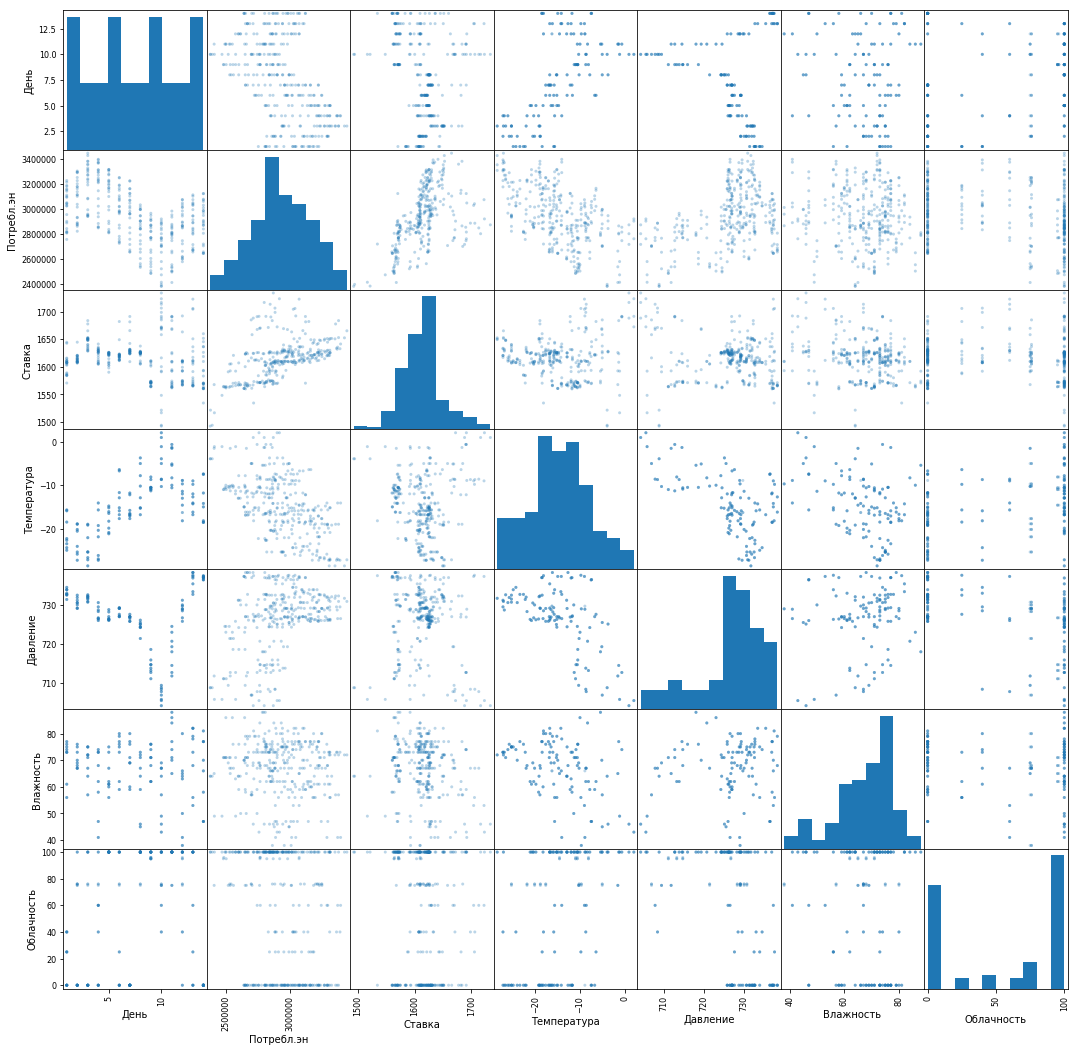

In [7]:
scatter_matrix(df[['День', 'Дата', 'Потребл.эн', 'Ставка', 'Температура', 'Давление',
       'Влажность', 'Облачность']], figsize=(18,18), alpha=0.3)
plt.show()

Посчитаем парные корреляции и отразим их на диаграмме. Передадим функции h_map на датасет и уровень значимости корреляции.

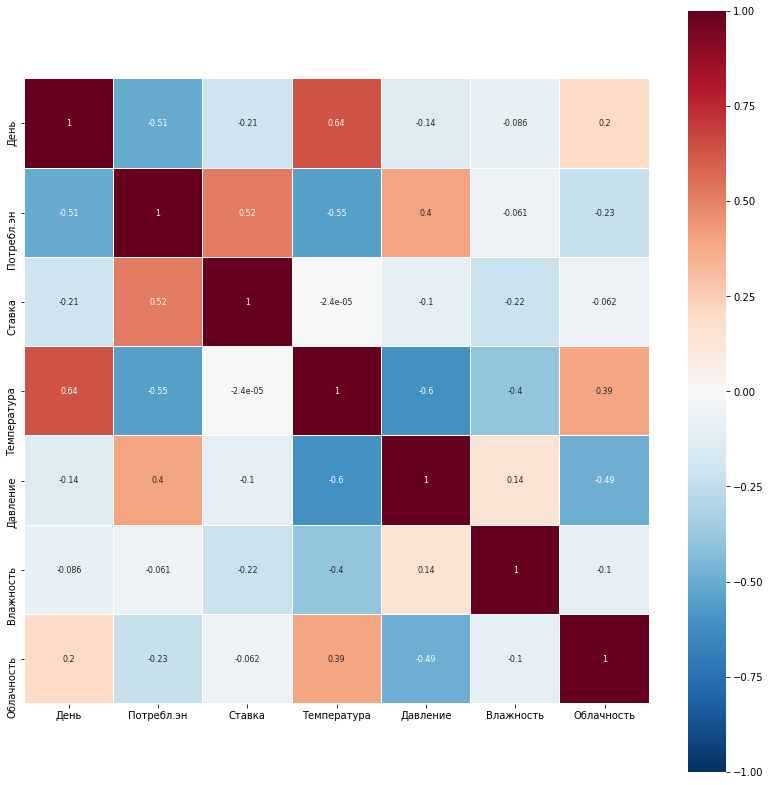

In [8]:
h_map(df,0)

Разделим переменные на целевую и объясняющие.

In [9]:
col=['День', 'Ставка', 'Температура', 'Давление',
       'Влажность', 'Облачность']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Потребл.эн']

Натренируем модель и изучим результаты. 

                            OLS Regression Results                            
Dep. Variable:             Потребл.эн   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     96.75
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.28e-69
Time:                        13:45:15   Log-Likelihood:                -4452.7
No. Observations:                 336   AIC:                             8919.
Df Residuals:                     329   BIC:                             8946.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.429e+06   1.11e+06     -6.720      

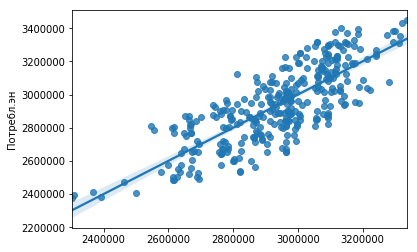

In [10]:
X=sm.add_constant(X)

reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

На что обратить внимание:
- R-square получился достаточно значимым. Должен не сильно отличаться от Adj. R-square.
- F-statistic должно быть существенно выше 4.
- Для регрессоров P>|t| должен быть меньше 0,05, а t выходить за интервал [-2,5 : 2,5], это позволяет нам отвергнуть гипотезу о нулевом влиянии регрессора.

В нашем случае модель получилась незначимой, так как удовлетворяются не все условия.

Ниже – расшифровка части важной информации по итогам работы модели. Эти показатели позволяют оценить ее качество и адекватность.

**BIC** - информационный критерий. Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров. Чем меньше значение, тем лучше.

**Omnibus** - тест на асимметрию и эксцесс остатков. Мы надеемся увидеть значение, близкое к нулю, которое указывало бы на нормальность. The Prob (Omnibus) выполняет статистический тест, показывающий вероятность того, что остатки нормально распределены. Мы надеемся увидеть здесь что-то близкое к 1. В случае если Omnibus относительно низок, а Prob (Omnibus) относительно высок, остатки в целом нормальны, но не идеальны. Подход с линейной регрессией, вероятно, будет лучше, чем случайное угадывание, но, вероятно, хуже нелинейных подходов.

**Skew** - мера симметрии данных. Мы хотим видеть что-то близкое к нулю, это указывает на то, что остаточное распределение нормально.

**Kurtosis** - это мера «пиковости» или кривизны данных. Более высокие пики приводят к большему куртозу. Большой куртоз можно интерпретировать как более плотную кластеризацию остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов (т.е. чем больше, тем лучше).

**Cond. No.** - значения больше 20 вызывают подозрения в мультиколлинеарности. Чаще всего сложно пройти данный тест. Чем меньше, тем лучше.

**R2** - насколько переменные хорошо объясняют разброс оценок. Максимальное значение – 1. Но при значениях более 0,9 надо крайне внимательно проверить на эффект мультиколлинеарности.

**Durbin-Watson** - тест на наличие автокорреляции в остатках. В идеале значение должно стремиться к 2 (минимальное значение – 0, максимальное – 4). Значения меньше 0,8 однозначно указывают на циклические колебания в остатках. Эмпирически считается, что статистика лежит в нормальных пределах, если больше 1,5 и меньше 2,5.

**Jarque-Bera (JB)** - тест на нормальность остатков. Используется на больших наборах данных, более 2000. По своей сути аналогичен Omnibus.

Выполним подбор регрессоров, при которых будут минимальная мультиколлинеарность и высокая точность. 

###### res=get_factors(df, Y, col)

Выведем список регрессоров лучшей модели.

In [11]:
res=get_factors(df, Y, col)
res.loc[0][2]

Количество комбинаций  64
Результаты перебора в порядке возрастания MSE:
            MSE        r2                             Переменные
0  3.082266e+10  0.412284  [Влажность, День, Температура, const]
1  3.179842e+10  0.393679        [Влажность, Температура, const]
2  3.445111e+10  0.343098             [День, Температура, const]
3  3.662706e+10  0.301608                   [Температура, const]
4  3.743596e+10  0.286184   [Влажность, Облачность, День, const]
5  3.814211e+10  0.272720              [Облачность, День, const]
6  3.842952e+10  0.267239               [Влажность, День, const]
7  3.900397e+10  0.256286                          [День, const]
8  4.973569e+10  0.051657                    [Облачность, const]


['Влажность', 'День', 'Температура', 'const']

Построим и интерпретируем лучшую модель.

                            OLS Regression Results                            
Dep. Variable:             Потребл.эн   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     77.63
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.52e-38
Time:                        13:45:19   Log-Likelihood:                -4534.2
No. Observations:                 336   AIC:                             9076.
Df Residuals:                     332   BIC:                             9092.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Температура -1.829e+04   2020.229     -9.052      

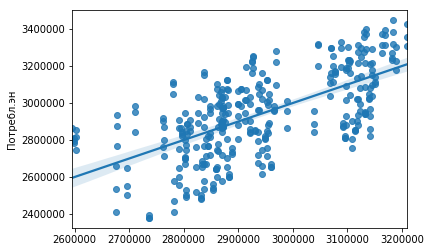

In [12]:
Y=df['Потребл.эн']
df=sm.add_constant(df)
#укажем пермеенные, которые будем использовать в качестве регрессоров
X=df[['Температура', 'День', 'Влажность', 'const']]
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

.